╒═══════════════╤═════════════╤═══════════════╕
│ 2022 expenses │ 2022 income │ 2022 net gain │
├───────────────┼─────────────┼───────────────┤
│ -33527.43     │ 33055.82    │ -471.61       │
╘═══════════════╧═════════════╧═══════════════╛


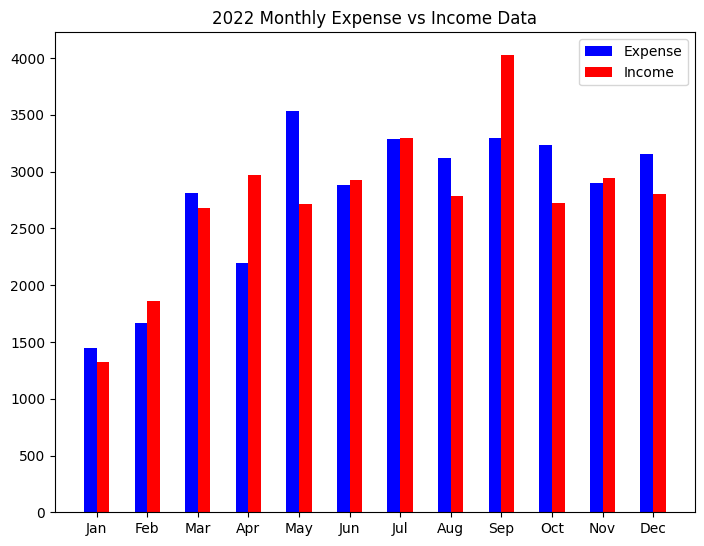

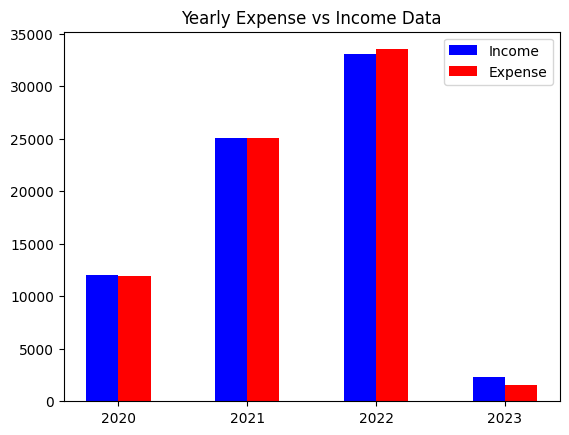

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from tabulate import tabulate

# creating a method to get whitaker bank data
def get_data(year):
    # importing the csv files that house all the transactions
    transactions = pd.read_csv("Transactions-9562-2023-01-24.csv",
                                parse_dates=['Date'],
                                na_values=[0.00])

    # creating the pandas dataframe
    df = pd.DataFrame(transactions)

    # subsetting the data to remove unneeded columns
    df1 = df.iloc[1:, [2,3,5]]
    # adding a column to select all rows containing the year
    # returning all rows with the 'Year' column value for the specified year
    dates = df1['Date']
    df1['Year'] = pd.DatetimeIndex(dates).year


    return df1.loc[df1['Year'] == year]

# creating a method to get capital one bank data
def data(year):
    # importing the data
    transactions_ctd = pd.read_csv("2023-01-26_360Checking...4632.csv",
                                        parse_dates=['Transaction Date'],
                                        na_values=[0.00])

    # creating the dataframe for the Captial One bank account dataframe
    df_ctd = pd.DataFrame(transactions_ctd)
    df_ctd = df_ctd.iloc[1:, [1,2]]
    df_ctd_dates = df_ctd['Transaction Date']

    # adding the column year
    df_ctd['Year'] = pd.DatetimeIndex(df_ctd_dates).year

    # creating a credit and debit column to match the Whiaker Bank account dataframe
    df_ctd['Debit'] =  np.where(df_ctd['Transaction Amount'] < 0, np.abs(df_ctd['Transaction Amount']), pd.NA)
    df_ctd['Credit'] =  np.where(df_ctd['Transaction Amount'] > 0, np.abs(df_ctd['Transaction Amount']), pd.NA)
    df_ctd['Date'] = df_ctd['Transaction Date']
   
    return df_ctd.loc[df_ctd['Year'] == year]

# creating a functin to merge both dataframes containing the bank account info
def merge_data(year):
    # storing the whitaker bank and capital one data in two seperate variables  
    whk_bank_data = get_data(year)
    cap_one_data = data(year)

    # merging the two dataframes and removing duplicate columns
    merged_data = pd.concat([cap_one_data, whk_bank_data])

    return merged_data.sort_values(by='Date', ascending=True)

# grouping the data by month and caculating monthly expenses vs income over the given year
# plotting the data using a bar graph
def plot_data(year):
    # getting the merged data
    df = merge_data(year)
    df['Debit'] = df['Debit'].fillna(0)
    df['Credit'] = df['Credit'].fillna(0)

    # separting the data by months so I can get the different months  
    jan_dates = df.loc[df['Date'] < str(year)+'-02-01']
    feb_dates = df.loc[(df['Date'] < str(year)+'-03-01') & (df['Date'] >= str(year)+'-02-01')]
    march_dates = df.loc[(df['Date'] < str(year)+'-04-01') & (df['Date'] >= str(year)+'-03-01')]
    april_dates = df.loc[(df['Date'] < str(year)+'-05-01') & (df['Date'] >= str(year)+'-4-01')]
    may_dates = df.loc[(df['Date'] < str(year)+'-06-01') & (df['Date'] >= str(year)+'-05-01')]
    june_dates = df.loc[(df['Date'] < str(year)+'-07-01') & (df['Date'] >= str(year)+'-06-01')]
    july_dates = df.loc[(df['Date'] < str(year)+'-08-01') & (df['Date'] >= str(year)+'-07-01')]
    aug_dates = df.loc[(df['Date'] < str(year)+'-09-01') & (df['Date'] >= str(year)+'-08-01')]
    sept_dates = df.loc[(df['Date'] < str(year)+'-10-01') & (df['Date'] >= str(year)+'-09-01')]
    oct_dates = df.loc[(df['Date'] < str(year)+'-11-01') & (df['Date'] >= str(year)+'-10-01')]
    nov_dates = df.loc[(df['Date'] < str(year)+'-12-01') & (df['Date'] >= str(year)+'-11-01')]
    dec_dates = df.loc[(df['Date'] <= str(year)+'-12-31') & (df['Date'] >= str(year)+'-12-01')]

    # plotting the expense vs income
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    data = np.arange(2)
    y = [
        [np.sum(jan_dates['Debit'])],[np.sum(jan_dates['Credit'])], [np.sum(feb_dates['Debit'])],[np.sum(feb_dates['Credit'])],
        [np.sum(march_dates['Debit'])],[np.sum(march_dates['Credit'])], [np.sum(april_dates['Debit'])],[np.sum(april_dates['Credit'])],
        [np.sum(may_dates['Debit'])],[np.sum(may_dates['Credit'])], [np.sum(june_dates['Debit'])],[np.sum(june_dates['Credit'])],
        [np.sum(july_dates['Debit'])],[np.sum(july_dates['Credit'])], [np.sum(aug_dates['Debit'])],[np.sum(aug_dates['Credit'])],
        [np.sum(sept_dates['Debit'])],[np.sum(sept_dates['Credit'])], [np.sum(oct_dates['Debit'])],[np.sum(oct_dates['Credit'])],
        [np.sum(nov_dates['Debit'])],[np.sum(nov_dates['Credit'])], [np.sum(dec_dates['Debit'])],[np.sum(dec_dates['Credit'])]
        ]
    # plotting the total monthly expenses
    # Jan data
    ax.bar(data+0.00, y[0], color='b', width=0.25)
    ax.bar(data+0.25, y[1], color='r', width=0.25)
    # Feb data
    ax.bar(data+1.00, y[2], color='b', width=0.25)
    ax.bar(data+1.25, y[3], color='r', width=0.25)
    # March data
    ax.bar(data+2.00, y[4], color='b', width=0.25)
    ax.bar(data+2.25, y[5], color='r', width=0.25)
    # April data
    ax.bar(data+3.00, y[6], color='b', width=0.25)
    ax.bar(data+3.25, y[7], color='r', width=0.25)
    # May data
    ax.bar(data+4.00, y[8], color='b', width=0.25)
    ax.bar(data+4.25, y[9], color='r', width=0.25)
    # June data
    ax.bar(data+5.00, y[10], color='b', width=0.25)
    ax.bar(data+5.25, y[11], color='r', width=0.25)
    # July data
    ax.bar(data+6.00, y[12], color='b', width=0.25)
    ax.bar(data+6.25, y[13], color='r', width=0.25)
    # August data
    ax.bar(data+7.00, y[14], color='b', width=0.25)
    ax.bar(data+7.25, y[15], color='r', width=0.25)
    # September data
    ax.bar(data+7.00, y[16], color='b', width=0.25)
    ax.bar(data+7.25, y[17], color='r', width=0.25)
    # October data
    ax.bar(data+8.00, y[18], color='b', width=0.25)
    ax.bar(data+8.25, y[19], color='r', width=0.25)
    # November data
    ax.bar(data+9.00, y[20], color='b', width=0.25)
    ax.bar(data+9.25, y[21], color='r', width=0.25)
    # December data
    ax.bar(data+10.00, y[22], color='b', width=0.25)
    ax.bar(data+10.25, y[23], color='r', width=0.25)

    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.legend(labels=('Expense', 'Income'))

    plt.title(str(year)+' Monthly Expense vs Income Data')

def plot_data(year):
    # getting the merged data
    df = merge_data(year)
    df['Debit'] = df['Debit'].fillna(0)
    df['Credit'] = df['Credit'].fillna(0)

    # separting the data by months so I can get the different months  
    jan_dates = df.loc[df['Date'] < str(year)+'-02-01']
    feb_dates = df.loc[(df['Date'] < str(year)+'-03-01') & (df['Date'] >= str(year)+'-02-01')]
    march_dates = df.loc[(df['Date'] < str(year)+'-04-01') & (df['Date'] >= str(year)+'-03-01')]
    april_dates = df.loc[(df['Date'] < str(year)+'-05-01') & (df['Date'] >= str(year)+'-4-01')]
    may_dates = df.loc[(df['Date'] < str(year)+'-06-01') & (df['Date'] >= str(year)+'-05-01')]
    june_dates = df.loc[(df['Date'] < str(year)+'-07-01') & (df['Date'] >= str(year)+'-06-01')]
    july_dates = df.loc[(df['Date'] < str(year)+'-08-01') & (df['Date'] >= str(year)+'-07-01')]
    aug_dates = df.loc[(df['Date'] < str(year)+'-09-01') & (df['Date'] >= str(year)+'-08-01')]
    sept_dates = df.loc[(df['Date'] < str(year)+'-10-01') & (df['Date'] >= str(year)+'-09-01')]
    oct_dates = df.loc[(df['Date'] < str(year)+'-11-01') & (df['Date'] >= str(year)+'-10-01')]
    nov_dates = df.loc[(df['Date'] < str(year)+'-12-01') & (df['Date'] >= str(year)+'-11-01')]
    dec_dates = df.loc[(df['Date'] <= str(year)+'-12-31') & (df['Date'] >= str(year)+'-12-01')]

    # plotting the expense vs income
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    x = np.arange(len(labels))
    expense = [np.sum(jan_dates['Debit']),np.sum(feb_dates['Debit']),np.sum(march_dates['Debit']), np.sum(april_dates['Debit']),np.sum(may_dates['Debit']), np.sum(june_dates['Debit']),
               np.sum(july_dates['Debit']), np.sum(aug_dates['Debit']),np.sum(sept_dates['Debit']), np.sum(oct_dates['Debit']),
               np.sum(nov_dates['Debit']),np.sum(dec_dates['Debit'])]
    income = [np.sum(jan_dates['Credit']),np.sum(feb_dates['Credit']),np.sum(march_dates['Credit']),np.sum(april_dates['Credit']),np.sum(may_dates['Credit']),
              np.sum(june_dates['Credit']),np.sum(july_dates['Credit']),np.sum(aug_dates['Credit']),np.sum(sept_dates['Credit']),np.sum(oct_dates['Credit']),
              np.sum(nov_dates['Credit']),np.sum(dec_dates['Credit'])]
    
    # plotting the total monthly expenses
    ax.bar(x-0.25/2, expense, color='b', width=0.25)
    ax.bar(x+0.25/2, income, color='r', width=0.25)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(labels=('Expense', 'Income'))

    plt.title(str(year)+' Monthly Expense vs Income Data')

# creating a function to get the total yearly expenses
def get_total_yearly_expenses(year):
    # setting df equal to the dataframe from the get_data method
    df = merge_data(year)
    # creating a numpy array and summing the elements of the array (all the expense from the given year)
    df['Debit'] = np.array(df['Debit'])
    expense = np.sum(df['Debit'])

    return -expense

# creating a function to get the total yearly income
def get_total_yearly_income(year):
    # setting df equal to the dataframe from the get data method
    df = merge_data(year)
    # creating the a numpy array and summing the elements all of the array (all the income receievd from the given year)
    df['Credit'] = np.array(df['Credit'])
    income = np.sum(df['Credit'])

    return income

# creating a function to get the net gain
def net_gain(year):
    # determining the net gain by subtracting the expenses from the income
    income = np.array(get_total_yearly_income(year))
    expense = np.array(get_total_yearly_expenses(year))
    return np.sum([income,expense])

# plotting the income vs expense over the specified years
def plot_year_to_year(year1, year2, year3, year4):
    # defining the income and expenses
    income_twenty_twenty = np.abs(get_total_yearly_income(2020))
    income_twenty_twenty_one = np.abs(get_total_yearly_income(2021))
    income_twenty_twenty_two = np.abs(get_total_yearly_income(2022))
    income_twenty_twenty_three = np.abs(get_total_yearly_income(2023))
    expense_twenty_twenty = np.abs(get_total_yearly_expenses(2020))
    expense_twenty_twenty_one = np.abs(get_total_yearly_expenses(2021))
    expense_twenty_twenty_two = np.abs(get_total_yearly_expenses(2022))
    expense_twenty_twenty_three = np.abs(get_total_yearly_expenses(2023))

    income = [income_twenty_twenty, income_twenty_twenty_one, income_twenty_twenty_two, income_twenty_twenty_three]
    expense = [expense_twenty_twenty, expense_twenty_twenty_one, expense_twenty_twenty_two, expense_twenty_twenty_three]

    # plotting the expense vs income vs gain 
    fig, ax = plt.subplots()
    labels = [year1, year2, year3, year4]
    x = np.arange(len(labels))

    # creating the bars for the graph
    bar1 = ax.bar(x - 0.25/2, income, color='b', width=0.25)
    bar2 = ax.bar(x + 0.25/2, expense, color='r', width=0.25)
 
    # setting the labels and ticks on the x axis
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(labels=('Income', 'Expense'))

    
    plt.title('Yearly Expense vs Income Data')
    #return y[0], y[4]


# creating a function to display the results from the other methods
def display_results(year):
    # printing the expenses and income for 2020, 2021, 2022, 2023
    expense = round(get_total_yearly_expenses(year),2)
    income = round(get_total_yearly_income(year),2)
    gain = round(net_gain(year),2)
    if year == 2020:
        plot_data(year)
    elif year == 2021:
        plot_data(year)
    elif year == 2022:
        plot_data(year)
    elif year == 2023:
        plot_data(year)
    else:
        return 'No data for that year! :('
    # printing a table to display the results
    table = [[str(year)+' expenses', str(year)+' income', str(year)+' net gain'], 
             [expense, income, gain]]

    print(tabulate(table, tablefmt='fancy_grid'))

#display_results(2020) 
#display_results(2021)
display_results(2022)
#display_results(2023)
plot_year_to_year(2020,2021,2022,2023)





